# Aplicação 2: IDHM dos municípios brasileiros - Parte II

Esse projeto faz parte de um exercício proposto pelo curso de analytics da Preditiva AI.

Essa aplicação faz parte do módulo 3 sobre correlações de dados.

O objetivo aqui é fazer análises exploratórias básicas para entender o comportamento dos municípios brasileiros em relação a indicadores sociais e econômicos.

## Dataframe e Tratamentos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_excel("brazil_cities.xlsx", skiprows=3)

In [3]:
main_df.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0
2,Rio De Janeiro,RJ,235380.0,0.799,0.840,0.719,50690.82,6744.0
3,Brasília,DF,143641.0,0.820,0.863,0.742,79099.77,3043.0
4,Porto Alegre,RS,58369.0,0.805,0.867,0.702,49577.53,2217.0


In [4]:
df_regiao = pd.read_excel("brazil_cities.xlsx", sheet_name="De-Para_Estado_Regiao", skiprows=1)
df_regiao = df_regiao.drop(columns = ["Unnamed: 0"])

In [5]:
df_regiao.head()

,Estado,Região
0,AC,Norte
1,AL,Nordeste
2,AM,Norte
3,AP,Norte
4,BA,Nordeste


In [6]:
brazil_city = main_df.merge(df_regiao, on = "Estado", how="inner")

In [47]:
brazil_city["estado_cidade_key"] = brazil_city["Município"] + " - " + brazil_city["Estado"]

In [48]:
brazil_city.head()

,Município,Estado,IBGE_1-4,IDHM,IDHM_Renda,IDHM_Educacao,GDP_CAPITA,COMP_P,Região,estado_cidade_key
0,São Paulo,SP,514794.0,0.805,0.843,0.725,57071.43,16030.0,Sudeste,São Paulo - SP
1,Osasco,SP,32305.0,0.780,0.776,0.718,106841.78,527.0,Sudeste,Osasco - SP
2,Barueri,SP,13818.0,0.790,0.791,0.708,177735.30,322.0,Sudeste,Barueri - SP
3,Santos,SP,15666.0,0.840,0.861,0.807,50544.73,569.0,Sudeste,Santos - SP
4,Campinas,SP,46027.0,0.805,0.829,0.731,49876.62,1508.0,Sudeste,Campinas - SP


## Exploração

- h) A renda anual per capita (por pessoa) pode ser analisada pela variável GDP_Capita. O atual presidente, concorrente do candidato que  você está auxiliando, disse em entrevista que “a maioria dos brasileiros tem uma renda anual superior a 21 mil”. Como você avalia essa frase?

In [8]:
brazil_city[["GDP_CAPITA"]].describe().T

,count,mean,std,min,25%,50%,75%,max
GDP_CAPITA,5573.0,21129.767244,20327.836119,3190.57,9061.72,15879.96,26156.99,314637.69


Quando se olha pela média, de fato, pode-se ter a impressão de que o que o candidato falou está correto. Entretanto, como vemos aqui, existem muitos outliers que fazem com que essa análise esteja incorreta. 50% dos brasileiros recebem menos de 16 mil reais e 75% recebem menos que 27 mil. 

In [9]:
brazil_city[["GDP_CAPITA"]].median()

GDP_CAPITA    15879.96
dtype: float64

- i) O IDHM_Renda é outra variável na qual podemos avaliar a situação da renda dos habitantes de cada município. Ela tem relação com o GDP_Capita?

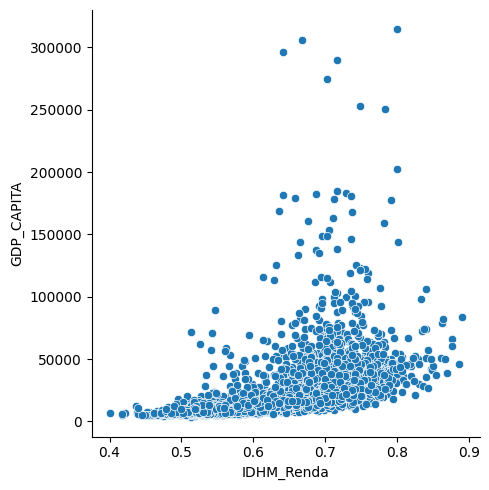

In [10]:
sns.relplot(y = brazil_city["GDP_CAPITA"], x = brazil_city["IDHM_Renda"])

In [11]:
brazil_city["GDP_CAPITA"].corr(brazil_city["IDHM_Renda"])

0.5265639466976222

Existe de fato uma relação positiva e moderada entre as duas variáveis

- j) Considerando ainda o IDHM_Renda, qual a análise dessa variável por região?


In [23]:
brazil_city.groupby("Região").agg({"IDHM_Renda": ["median", "mean", "std", "min", "max"]})

IDHM_Renda                                  
                 median      mean       std    min    max
Região                                                   
Centro-Oeste      0.686  0.684489  0.042849  0.547  0.863
Nordeste          0.559  0.562261  0.046108  0.400  0.798
Norte             0.593  0.592824  0.061939  0.437  0.789
Sudeste           0.687  0.681238  0.057708  0.502  0.891
Sul               0.713  0.713417  0.044179  0.570  0.870

As regiões variam bastante. Olhando pela mediana, vemos que 50% da região sul possui um indicador de atºe 0.71 ao passo que esse indicador para a região Nordeste é de apenas 0.55. O Nordeste acaba sendo segundo todos os critérios da tabela a região mais pobre.

- k) Conclua traçando o perfil de renda per capita dos municípios do Brasil e quais propostas faria para essa área.


In [52]:
top = brazil_city[["estado_cidade_key", "GDP_CAPITA", "Região"]].sort_values("GDP_CAPITA", ascending=False).iloc[0:15]

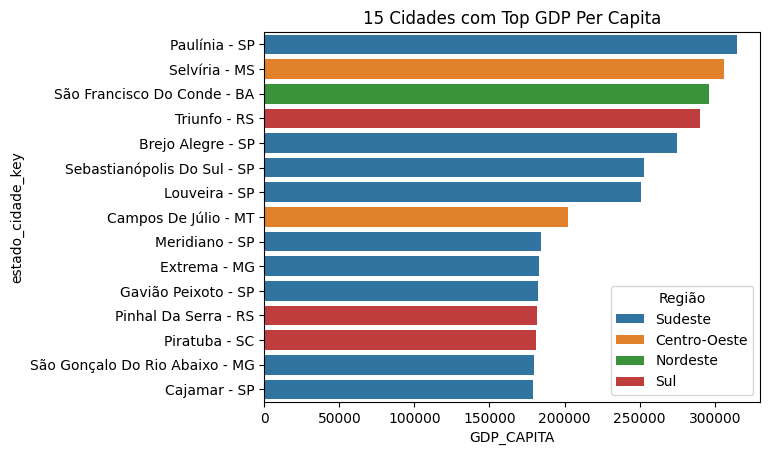

In [55]:
sns.barplot(data=top, y = "estado_cidade_key", x = "GDP_CAPITA", hue="Região")
plt.title("15 Cidades com Top GDP Per Capita");

Podemos ver que das 15 cidades com maiores GDP per Capita, 9 estão na região sudeste, enquanto apenas uma cidade do Nordeste está presente.